In [3]:
# データ準備
import pandas as pd
df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv',skiprows=1, header=None)
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

#パイプライン
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

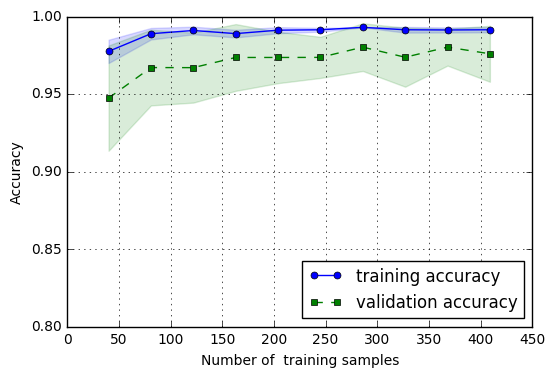

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,10),
                                                        cv=10, 
                                                        n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15,color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of  training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

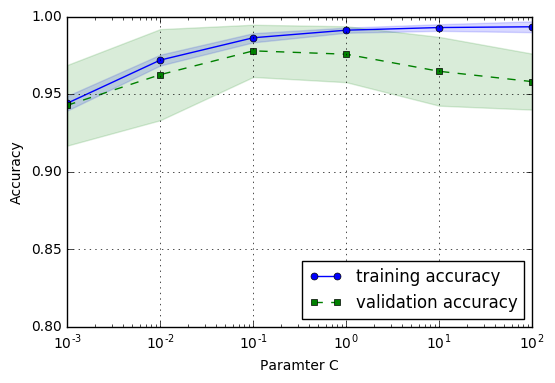

In [13]:
from sklearn.model_selection import validation_curve

param_range = [0.001,0.01, 0.1 ,1.0,10.0,100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name ='clf__C',
                                                        param_range=param_range,
                                                        cv=10)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std, train_mean-train_std,alpha=0.15,color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std, test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Paramter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

↑
Parameter Cが小さいと、traning accuracy自体の値が低い→学習不足
Cが大きいと、traningu accuracyに比べて、validation accuracyが低い→過学習
C=0.1あたりがちょうど良い。